imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pickle
%matplotlib inline

Read data

In [24]:
df = pd.read_csv('../data/attrition-formated.csv')

prepare data

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IsMale
0,41,1,1,1102,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,0
1,49,0,2,279,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,1
2,37,1,1,1373,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,2,1392,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,0,1,591,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,1


In [31]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [4]:
df = pd.get_dummies(df, columns = ['EducationField'] )

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IsMale',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree'],
      dtype='object')

Correlations

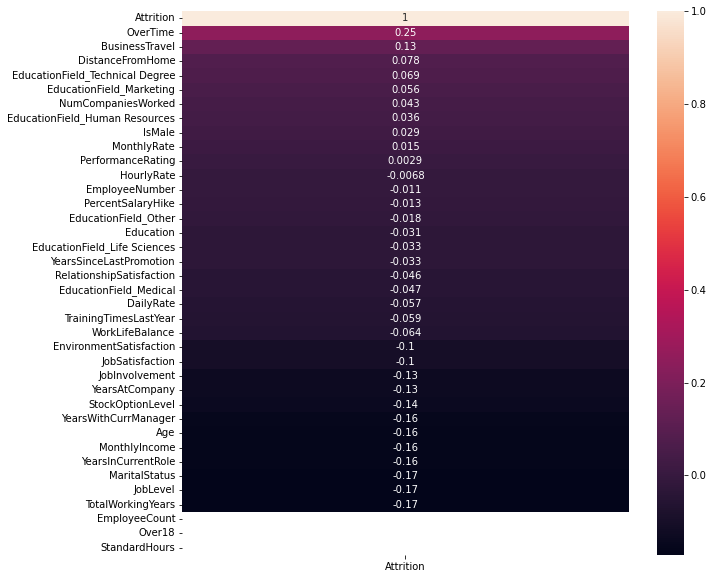

In [6]:
c = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c[['Attrition']].sort_values('Attrition', ascending = False),annot=True);

In [7]:
#sns.pairplot(c);

In [8]:
df.dropna(inplace=True)

In [9]:
logreg = LogisticRegression(max_iter = 2000 )
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Attrition']), df['Attrition'], stratify = df['Attrition'])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg.fit(X_train, y_train)

In [10]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [11]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.8776223776223776, 0.8833138856476079)

In [12]:
coefs = pd.DataFrame(logreg.coef_).T
coefs.columns = ['coefs']
coefs['abs'] = abs(coefs['coefs'])
coefs['name'] = df.drop(columns=['Attrition']).columns


In [13]:
coefs.sort_values('abs', ascending=False)

,coefs,abs,name
17,0.807244,0.807244,OverTime
26,0.799101,0.799101,YearsAtCompany
27,-0.592273,0.592273,YearsInCurrentRole
23,-0.586439,0.586439,TotalWorkingYears
28,0.569119,0.569119,YearsSinceLastPromotion
11,-0.505977,0.505977,JobSatisfaction
15,0.496198,0.496198,NumCompaniesWorked
29,-0.485921,0.485921,YearsWithCurrManager
12,-0.461055,0.461055,MaritalStatus
10,-0.452154,0.452154,JobLevel


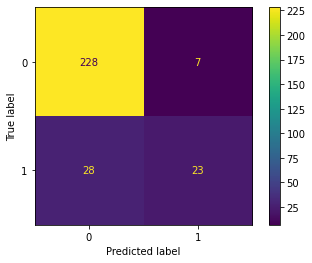

In [14]:
metrics.plot_confusion_matrix(logreg, X_test, y_test)

In [15]:
with open('../pickles/train_test.pkl', 'wb') as pickle_out:
    pickle.dump((X_train, X_test, y_train, y_test), pickle_out)

In [16]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.45098039215686275

In [17]:
logreg.score(X_test, y_test)

0.8776223776223776

In [18]:
with open('../pickles/train_test_rs.pkl', 'rb') as pickle_in:
    X_train, X_test, y_train, y_test = pickle.load(pickle_in)

In [19]:
logreg.fit(X_train, y_train, )

LogisticRegression(max_iter=2000)

In [20]:
logreg.score(X_test, y_test), logreg.score(X_train, y_train)

(0.7622377622377622, 0.787030213706706)

In [21]:
metrics.recall_score(y_test, logreg.predict(X_test))

0.7058823529411765